In [60]:
import os
import pandas as pd

output_folder = 'AIzymes_IC50'
os.makedirs(output_folder, exist_ok=True)

data = {
    'NQEFT': {"filename": "Landscapes_CAZ_NQEFT", "residues": [76, 124, 132, 156, 243]},
    'AFST':  {"filename": "Landscapes_CAZ_AFST", "residues": [33, 72, 212, 213]},
    'LFLI':  {"filename": "Landscapes_CAZ_LFLI", "residues": [67, 142, 158, 215]}
}

reference_seq = 'OXA48.seq' 
with open(f'{output_folder}/{reference_seq}', 'r') as f:
    reference_sequence = f.read().strip()

# Process .csv files
for landscape in data:
    df = pd.read_csv(f'{output_folder}/{data[landscape]["filename"]}.csv')
    for idx, row in df.iterrows():
        new_sequence = list(reference_sequence)  
        for mut_idx, residue in enumerate(data[landscape]["residues"]):
            new_sequence[residue-1] = row['mutations'][mut_idx] 
        df.at[idx, 'sequence'] = ''.join(new_sequence)

    df.to_csv(f'{output_folder}/{data[landscape]["filename"]}_updated.csv', index=False)

In [32]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available

False


### PLM trainer loaded. ###
Loading dataset: AIzymes_IC50/Landscapes_CAZ_NQEFT_updated.csv
Loading dataset: AIzymes_IC50/Landscapes_CAZ_AFST_updated.csv
Loading dataset: AIzymes_IC50/Landscapes_CAZ_LFLI_updated.csv
### 3 files loaded into one dataset. ###
### Data normalized. ###
train_df


,sequence,IC50,norm_IC50
29,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.030,0.035928
5,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.020,0.015968
37,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.062,0.099800
1,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.014,0.003992
30,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.140,0.255489
2,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.126,0.227545
0,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.015,0.005988
55,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.014,0.003992
39,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.166,0.307385
9,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.081,0.137725


test_df


,sequence,IC50,norm_IC50
10,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.076,0.127745
51,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.140,0.255489
7,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.332,0.638723
61,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.034,0.043912
42,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.101,0.177645
22,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.013,0.001996
38,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.473,0.920160
60,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.141,0.257485
20,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.012,0.000000
14,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.179,0.333333


100%|██████████| 100/100 [09:32<00:00,  5.73s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


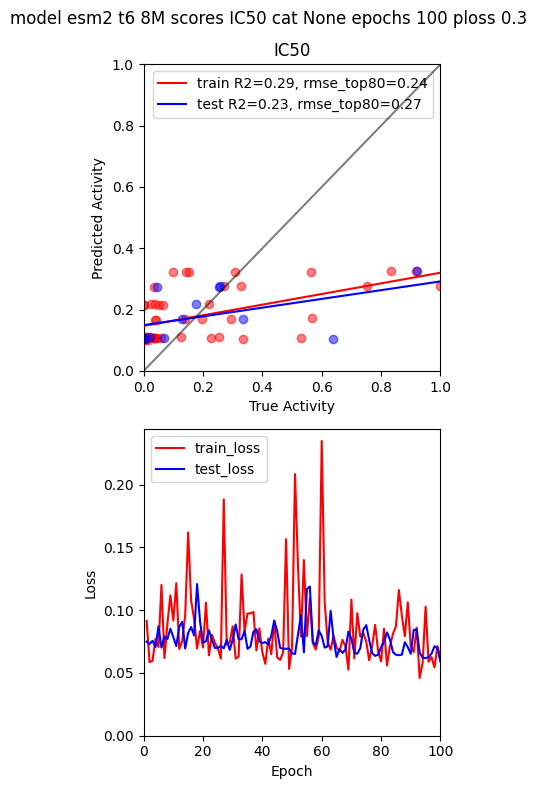

In [62]:
%run src/plm_trainer_multi_small.py

df_path = [f'{output_folder}/{data[landscape]["filename"]}_updated.csv' for landscape in data]
#df_path = f'{output_folder}/{data["AFST"]["filename"]}_updated.csv'
scores          = ['IC50']

dataset = PLM_trainer(
    output_folder   = output_folder,
    verbose         = False
    )

PLM_trainer.load_dataset(    
    dataset,            
    df_path         = df_path,
    scores          = scores,
    labels          = [],
    select_unique   = True,
    print_testtrain = True,
    normalize       = 'minmax'
    )

PLM_trainer.train_PLM( 
    dataset,
    epochs          = 100,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.3,
    liveplot        = False,
    overwrite       = True
)